In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

#### load df

In [5]:
import pandas as pd
import numpy as np
import sklearn
import nltk
from sklearn.preprocessing import OneHotEncoder



Loading and Initial Inspection

In [6]:
# loading dataset
data = pd.read_csv('dataset.csv')
data.head()


,FullName,Gender,Major,Description,Personality,Interests,Communication_Style,Looking_for,Favorite_Subject,Study_Location,Study_Time
0,Chu Hoàng Việt,Male,DS,"Yêu màu hồng, ghét sự giả dối",ENFJ,"V-pop, Volleyball, Board games",Text message,NaN,"Calculus, Linear Algebra, Artificial Intelligence","Café, Library",Early Morning
1,Nguyễn Hoài Anh,Male,ICT,oke hế lô và hi xin chào các bạn mình là justx...,ENTP,"EDM, Board games, DIY, Movie, Netflix",Text message,Chit Chatting,"Calculus, Chemistry, Programming","Café, Home, Online",Midday
2,Nguyễn Hoằng Phát,Male,ICT,Thành tựu lớn nhất đời tôi: làm bạn Xoài 🥰,ESFP,"Football, Cooking, Food tour, Travel, Rap",In-person (face-to-face),Share knowledge,Programming,Home,Night
3,Nguyễn Hoàng Lân,Male,ICT,"Đẹp zai, học giỏi, giàu, ga lăng, tinh tế, hài...",ENTP,"K-pop, Ballet, Dancing, Singing, Makeup",Video call,Chit Chatting,"Programming, Artificial Intelligence","Café, Bookstore",Overnight
4,Đặng Trần Tiến,Male,Pharmacy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1 way preprocess

In [12]:
df = data.copy()
df.drop(columns=["FullName", "Gender", "Description"], inplace=True)
df

,Major,Personality,Interests,Communication_Style,Looking_for,Favorite_Subject,Study_Location,Study_Time
0,DS,ENFJ,"V-pop, Volleyball, Board games",Text message,NaN,"Calculus, Linear Algebra, Artificial Intelligence","Café, Library",Early Morning
1,ICT,ENTP,"EDM, Board games, DIY, Movie, Netflix",Text message,Chit Chatting,"Calculus, Chemistry, Programming","Café, Home, Online",Midday
2,ICT,ESFP,"Football, Cooking, Food tour, Travel, Rap",In-person (face-to-face),Share knowledge,Programming,Home,Night
3,ICT,ENTP,"K-pop, Ballet, Dancing, Singing, Makeup",Video call,Chit Chatting,"Programming, Artificial Intelligence","Café, Bookstore",Overnight
4,Pharmacy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1630,Pharmacy,ESTP,"Dancing, Anime",Text message,Study supporter,"Chemistry, Health Care","Bookstore, Café",Early Morning
1631,AE,ENFJ,"Board games, K-pop",In-person (face-to-face),Study supporter,"Calculus, Physics, Programming","Library, Home, Café",Overnight
1632,AMS,INFP,"Badminton, Investment, Swimming, Study, Korean...",Video call,Share knowledge,"Chemistry, Biology",Café,Midnight
1633,AMS,INTP,"Makeup, Anime, Politics, Board games",Text message,Study supporter,Biology,Café,Midday


In [13]:
# fill NaN values with unknown
data = data.fillna('unknown')
dataset = data.copy()


In [14]:
# one-hot encoding data
encoder = OneHotEncoder(sparse_output=False)
categorical_col = ['Gender', 'Major','Personality', 'Interests','Looking_for','Communication_Style', 'Favorite_Subject','Study_Location', 'Study_Time']
encoded_data = encoder.fit_transform(dataset[categorical_col])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_col))

data_encoded = pd.concat([dataset.drop(columns=categorical_col), encoded_df], axis=1)

In [15]:
# data_encoded.drop(columns=['FullName','Description'], inplace=True)
data_encoded

,FullName,Description,Gender_Female,Gender_Male,Gender_Prefer not to say,Major_AE,Major_AES,Major_AMS,Major_ATE,Major_BIT,...,"Study_Location_Online, Library, Café","Study_Location_Online, Library, Home",Study_Location_unknown,Study_Time_Early Morning,Study_Time_Evening,Study_Time_Midday,Study_Time_Midnight,Study_Time_Night,Study_Time_Overnight,Study_Time_unknown
0,Chu Hoàng Việt,"Yêu màu hồng, ghét sự giả dối",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Nguyễn Hoài Anh,oke hế lô và hi xin chào các bạn mình là justx...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Nguyễn Hoằng Phát,Thành tựu lớn nhất đời tôi: làm bạn Xoài 🥰,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Nguyễn Hoàng Lân,"Đẹp zai, học giỏi, giàu, ga lăng, tinh tế, hài...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Đặng Trần Tiến,unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,Nguyễn Lê Minh Thy,unknown,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1631,Nguyễn Thanh Trà,unknown,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1632,Đinh Thị Linh Trâm,unknown,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1633,Nguyễn Lâm Tùng,unknown,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
# run PCA for encoded data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

train_data = data_encoded.iloc[:, 5:]

pca = PCA(n_components=2)
pca_obj = pca.fit_transform(train_data)

tsne = TSNE(n_components=2)
tsne_obj = tsne.fit_transform(train_data)

train_data

,Major_AE,Major_AES,Major_AMS,Major_ATE,Major_BIT,Major_CH,Major_CS,Major_DS,Major_EER,Major_FST,...,"Study_Location_Online, Library, Café","Study_Location_Online, Library, Home",Study_Location_unknown,Study_Time_Early Morning,Study_Time_Evening,Study_Time_Midday,Study_Time_Midnight,Study_Time_Night,Study_Time_Overnight,Study_Time_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1631,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1632,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1633,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Another way preprocess

In [28]:
interests = [
    "V-pop", "K-pop", "EDM", "art", "politics", "vlogging", "baseball",
    "football", "volleyball", "table tennis", "basketball", "skiing",
    "swimming", "skateboarding", "board games", "DIY", "cooking", "painting",
    "bowling", "ballet", "dancing", "singing", "yoga", "jogging", "anime",
    "food tour", "travel", "study", "gym", "korean food", "coffee", "tea",
    "badminton", "hiphop", "investment", "alcoholic", "karate", "taekwondo",
    "rap", "makeup", "movie", "netflix", "Esport"
]
communication_style = ["Video call", "Phone call", "Text message", "In-person (face-to-face)"]
looking_for = ["Study supporter", "Chit Chatting", "Share knowledge"]
subjects = [
    "Calculus", "Linear Algebra", "Chemistry", "Physics", "Programming",
    "Artificial Intelligence", "Biology", "Practical laboratory",
    "Environment", "Health Care", "Electronic"
]
study_locations = ["café", "home", "library", "bookstore", "online"]
study_times = ["Early Morning", "Midday", "Evening", "Night", "Midnight", "Overnight"]
personalities = [
    "INTJ", "INTP", "ENTJ", "ENTP", "INFJ", "INFP", "ENFJ", "ENFP",
    "ISTJ", "ISFJ", "ESTJ", "ESFJ", "ISTP", "ISFP", "ESTP", "ESFP"
]
major = ['DS', 'ICT', 'Pharmacy', 'CH', 'CS', 'MST', 'BIT', 'MAT', 'FST',
       'AMS', 'EER', 'SIC', 'MET', 'AE', 'AES', 'ATE', 'SST']

from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

df = data.copy()
df = df.fillna('unknown')

interest_enc = MultiLabelBinarizer()
communication_style_enc = MultiLabelBinarizer()
looking_for_enc = MultiLabelBinarizer()
subjects_enc = MultiLabelBinarizer()
study_locations_enc = MultiLabelBinarizer()
study_times_enc = MultiLabelBinarizer()
personalities_enc = MultiLabelBinarizer()
major_enc = MultiLabelBinarizer()

interest_enc.fit([interests])
communication_style_enc.fit([communication_style])
looking_for_enc.fit([looking_for])
subjects_enc.fit([subjects])
study_locations_enc.fit([study_locations])
study_times_enc.fit([study_times])
personalities_enc.fit([personalities])
major_enc.fit([major])

interests_encoded = pd.DataFrame(interest_enc.transform(df['Interests'].str.split(', ')), columns=interest_enc.classes_)
communication_style_encoded = pd.DataFrame(communication_style_enc.transform(df['Communication_Style'].str.split(', ')), columns=communication_style_enc.classes_)
looking_for_encoded = pd.DataFrame(looking_for_enc.transform(df['Looking_for'].str.split(', ')), columns=looking_for_enc.classes_)
subjects_encoded = pd.DataFrame(subjects_enc.transform(df['Favorite_Subject'].str.split(', ')), columns=subjects_enc.classes_)
study_locations_encoded = pd.DataFrame(study_locations_enc.transform(df['Study_Location'].str.split(', ')), columns=study_locations_enc.classes_)
study_times_encoded = pd.DataFrame(study_times_enc.transform(df['Study_Time'].str.split(', ')), columns=study_times_enc.classes_)
personalities_encoded = pd.DataFrame(personalities_enc.transform(df['Personality'].str.split(', ')), columns=personalities_enc.classes_)
major_encoded = pd.DataFrame(major_enc.transform(df['Major'].str.split(', ')), columns=major_enc.classes_)
new_df = df.drop(columns=['Interests', 'Communication_Style', 'Looking_for', 'Favorite_Subject', 'Study_Location', 'Study_Time', 'Personality', 'Major'])
new_df = pd.concat([new_df, interests_encoded, communication_style_encoded, looking_for_encoded, subjects_encoded, study_locations_encoded, study_times_encoded, personalities_encoded, major_encoded], axis=1)

train_data = new_df.iloc[:,3:]

# run PCA for encoded data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
pca_obj = pca.fit_transform(train_data)

tsne = TSNE(n_components=2)
tsne_obj = tsne.fit_transform(train_data)

train_data # print

d:\B3\Group Project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Alcoholic', 'Anime', 'Art', 'Badminton', 'Ballet', 'Baseball', 'Basketball', 'Board games', 'Bowling', 'Coffee', 'Cooking', 'Dancing', 'Food tour', 'Football', 'Gym', 'Hiphop', 'Ice cream', 'Investment', 'Jogging', 'Karate', 'Korean food', 'Makeup', 'Movie', 'Netflix', 'Painting', 'Politics', 'Rap', 'Singing', 'Skateboarding', 'Skiing', 'Study', 'Swimming', 'Table tennis', 'Taekwondo', 'Tea', 'Travel', 'Vlogging', 'Volleyball', 'Yoga', 'unknown'] will be ignored
  warnings.warn(
d:\B3\Group Project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['unknown'] will be ignored
  warnings.warn(
d:\B3\Group Project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['unknown'] will be ignored
  warnings.warn(
d:\B3\Group Project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWar

,DIY,EDM,Esport,K-pop,V-pop,alcoholic,anime,art,badminton,ballet,...,DS,EER,FST,ICT,MAT,MET,MST,Pharmacy,SIC,SST
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1631,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# show total column names = unknown
for name in train_data.columns:
    if name == 'unknown':
        print(name)

105

#### 2D Plot

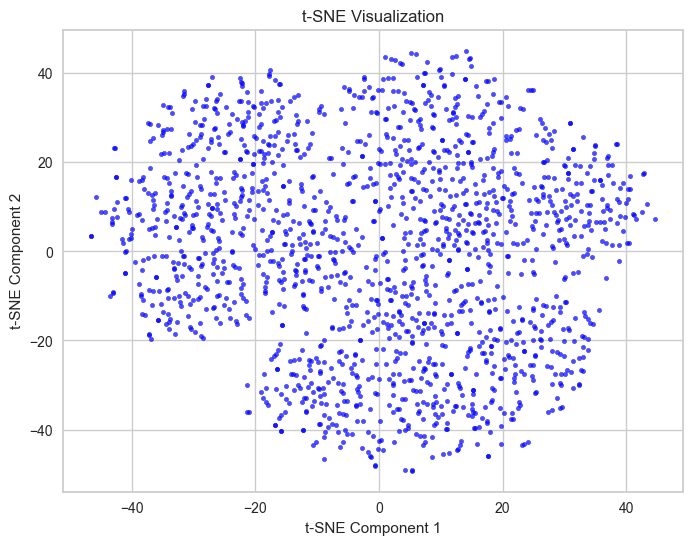

In [26]:
# run t-SNE for encoded data
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c='blue', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# One-Hot-Encoding

#### K-Elbow Method

d:\B3\Group Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\B3\Group Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\B3\Group Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\B3\Group Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\B3\Group Project\.venv\Lib\site-packages\sklearn\

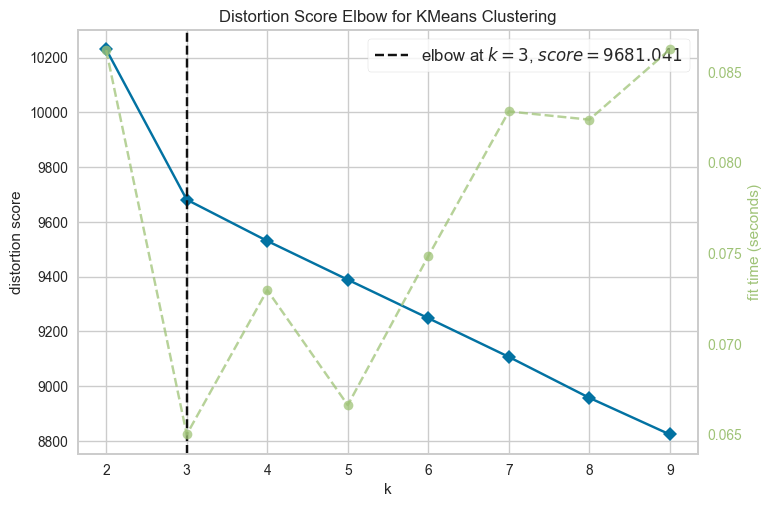

Number of cluster for One-Hot Encoded Data: 3


In [27]:
# K Elbow choosing
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(train_data)
best_k_onehot = visualizer.elbow_value_
visualizer.show()
print(f"Number of cluster for One-Hot Encoded Data: {best_k_onehot}")

#### Without Dimensional Reduction

d:\B3\Group Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (manhattan): 0.14060502259263039
Silhouette Score (euclidean): 0.07398495091444734
Silhouette Score (Pearson): 0.14316871378968488
Davies Bouldin Score: 3.425584548947601


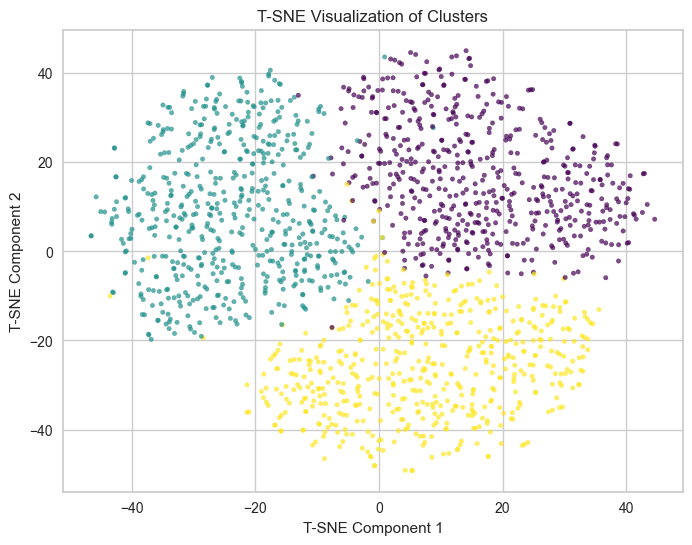

In [28]:
# Without PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances

# Apply KMeans clustering
kmeans = KMeans(n_clusters=best_k_onehot, random_state=42)
kmeans.fit(train_data)
print(f"Silhouette Score (manhattan): {silhouette_score(train_data, kmeans.predict(train_data), metric='manhattan')}")
print(f"Silhouette Score (euclidean): {silhouette_score(train_data, kmeans.predict(train_data), metric='euclidean')}")
print(f"Silhouette Score (Pearson): {silhouette_score(pairwise_distances(train_data, metric='correlation'), kmeans.predict(train_data), metric='precomputed')}")
print(f'Davies Bouldin Score: {davies_bouldin_score(train_data, kmeans.predict(train_data))}')

pca = PCA(n_components=2)
pca_obj = pca.fit_transform(train_data)

# Plot the PCA results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.title('T-SNE Visualization of Clusters')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.show()


#### PCA

d:\B3\Group Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (manhattan): 0.8535319290551309
Silhouette Score (euclidean): 0.858003869157668
Silhouette Score (Pearson): 0.3370030581039755
Davies Bouldin Score: 0.19668725868705203


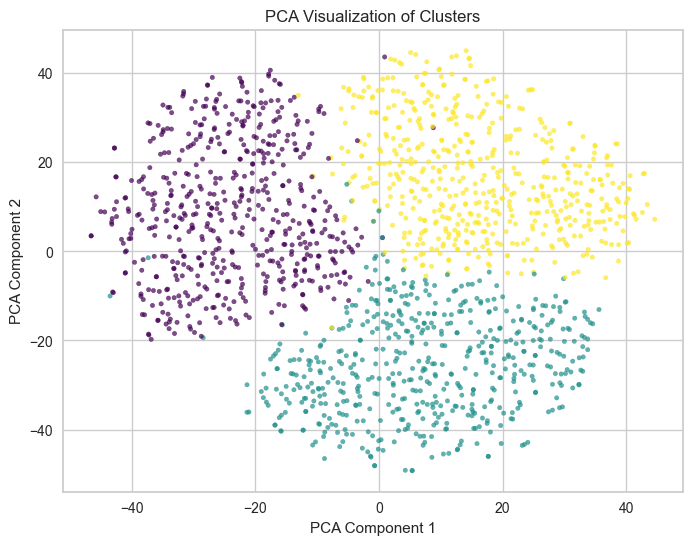

In [29]:
# With PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_obj = pca.fit_transform(train_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_obj)
print(f"Silhouette Score (manhattan): {silhouette_score(pca_obj, kmeans.predict(pca_obj), metric='manhattan')}")
print(f"Silhouette Score (euclidean): {silhouette_score(pca_obj, kmeans.predict(pca_obj), metric='euclidean')}")
print(f"Silhouette Score (Pearson): {silhouette_score(pairwise_distances(pca_obj, metric='correlation'), kmeans.predict(pca_obj), metric='precomputed')}")
print(f'Davies Bouldin Score: {davies_bouldin_score(pca_obj, kmeans.predict(pca_obj))}')

# Plot the PCA results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Word Embedding

INCORRECT (SKIP THIS PART)

In [22]:
import spacy

In [23]:
# !python -m spacy download en_core_web_md

In [24]:
# prompt: use glove model to embed columns Interests, Favorite_Subject, Study_Location

import gensim.downloader as api

# Download the GloVe model
glove_model = api.load("glove-wiki-gigaword-100")

def embed_column(column):
  """Embeds a column of text data using GloVe."""
  embeddings = []
  for row in column:
    text = row.split()
    for word in text:
      try:
        if word.lower() == 'table tennis':
          embedding = glove_model.get_vector('pingpong')
        elif word.lower() == 'board games' or word.lower() == 'Esport':
          embedding = glove_model.get_vector('games')
        elif word.lower() == 'food tour' or word.lower() == 'korean food':
          embedding = glove_model.get_vector('food')
        elif word.lower() == 'Linear Algebra':
          embedding = glove_model.get_vector('math')
        elif word.lower() == 'Practical laboratory':
          embedding = glove_model.get_vector('practice')
        elif word.lower() == 'Health Care':
          embedding = glove_model.get_vector('healthcare')
        elif word.lower() == 'Artificial Intelligence':
          embedding = glove_model.get_vector('ai')
        else:
          embedding = glove_model.get_vector(word.lower())
          embeddings.append(embedding)
      except KeyError:
        # Handle cases where a word isn't in the vocabulary
        embeddings.append(np.zeros(100))  # Replace with a zero vector or another strategy
    return np.array(embeddings)

new_dataset = data.copy()
# new_dataset = new_dataset.fillna('unknown')
# Embed the columns
interests_embeddings = embed_column(df["Interests"])
favorite_subject_embeddings = embed_column(df["Favorite_Subject"])
study_location_embeddings = embed_column(df["Study_Location"])

# Ensure embeddings DataFrame has string column names as well
embeddings_columns = ['interest_embedding_' + str(i) for i in range(interests_embeddings.shape[1])]
favorite_subject_columns = ['favorite_subject_embedding_' + str(i) for i in range(favorite_subject_embeddings.shape[1])]
study_location_columns = ['study_location_embedding_' + str(i) for i in range(study_location_embeddings.shape[1])]


encoder = OneHotEncoder(sparse_output=False)
categorical = ['Major','Personality','Looking_for','Communication_Style', 'Study_Time']
encoded = encoder.fit_transform(new_dataset[categorical])

new_data_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical))
new_data_df = pd.concat([new_data_df,
                          pd.DataFrame(interests_embeddings, columns=embeddings_columns),
                          pd.DataFrame(favorite_subject_embeddings, columns=favorite_subject_columns),
                          pd.DataFrame(study_location_embeddings, columns=study_location_columns)], axis=1)

[==================================================] 100.0% 128.1/128.1MB downloaded


In [25]:
# prompt: change nan value of new_data_df  to 0

new_data_df = new_data_df.fillna(0)

#### Without Dimensional Reduction

Silhouette Score (manhattan): 0.20499398112791717
Silhouette Score (euclidean): 0.11628068373219363
Davies Bouldin Score: 2.662525041022267


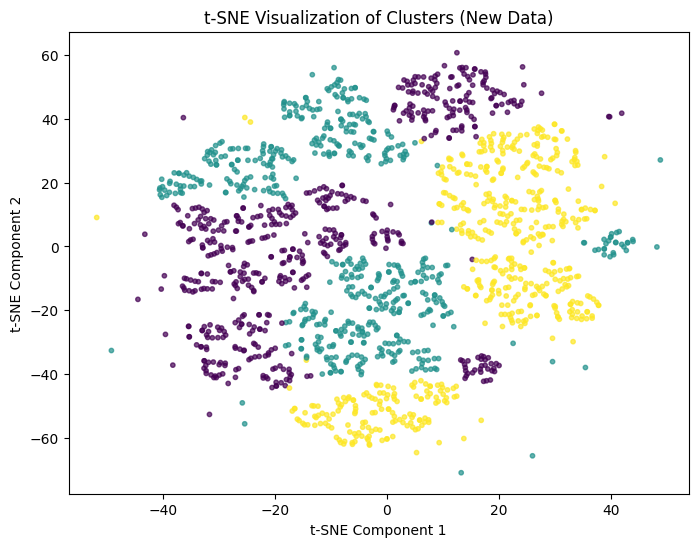

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.decomposition import PCA

# Apply KMeans clustering to new_data_df
kmeans_new = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
kmeans_new.fit(new_data_df)

# Print evaluation metrics (optional)
print(f"Silhouette Score (manhattan): {silhouette_score(new_data_df, kmeans_new.predict(new_data_df), metric='manhattan')}")
print(f"Silhouette Score (euclidean): {silhouette_score(new_data_df, kmeans_new.predict(new_data_df), metric='euclidean')}")
print(f'Davies Bouldin Score: {davies_bouldin_score(new_data_df, kmeans_new.predict(new_data_df))}')

# You might want to apply dimensionality reduction (e.g., t-SNE)
# to visualize the clusters if your data has many features.

# Example of visualizing clusters with reduced dimensions
# (Replace this with your preferred dimensionality reduction method)
# tsne_new = TSNE(n_components=2, random_state=0)
# tsne_obj_new = tsne_new.fit_transform(new_data_df)

# Without PCA
pca = PCA(n_components=2)
pca_obj_new = pca.fit_transform(new_data_df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_obj_new[:, 0], pca_obj_new[:, 1], s=10, c=kmeans_new.labels_, alpha=0.7, cmap='viridis')
plt.title('PCA Visualization of Clusters (New Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


#### T-SNE

Silhouette Score (manhattan): 0.3947332031461069
Silhouette Score (euclidean): 0.3979893922805786
Davies Bouldin Score: 0.9105403335864791


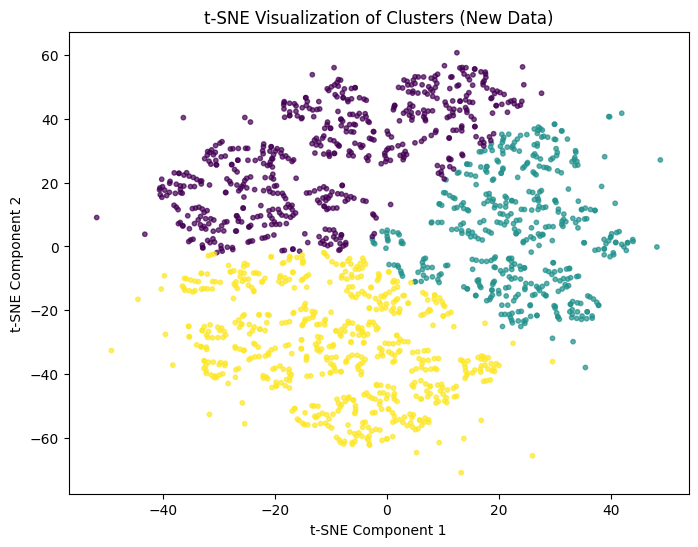

In [ ]:
# PCA
pca = PCA(n_components=2)
pca_obj_new = pca.fit_transform(new_data_df)

# Apply KMeans clustering to new_data_df
kmeans_new = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
kmeans_new.fit(pca_obj_new)

# Print evaluation metrics (optional)
print(f"Silhouette Score (manhattan): {silhouette_score(pca_obj_new, kmeans_new.predict(pca_obj_new), metric='manhattan')}")
print(f"Silhouette Score (euclidean): {silhouette_score(pca_obj_new, kmeans_new.predict(pca_obj_new), metric='euclidean')}")
print(f'Davies Bouldin Score: {davies_bouldin_score(pca_obj_new, kmeans_new.predict(pca_obj_new))}')

# You might want to apply dimensionality reduction (e.g., t-SNE)
# to visualize the clusters if your data has many features.

# Example of visualizing clusters with reduced dimensions
# (Replace this with your preferred dimensionality reduction method)
# tsne_new = TSNE(n_components=2, random_state=0)
# tsne_obj_new = tsne_new.fit_transform(new_data_df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_obj_new[:, 0], pca_obj_new[:, 1], s=10, c=kmeans_new.labels_, alpha=0.7, cmap='viridis')
plt.title('PCA Visualization of Clusters (New Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


#### PCA

Silhouette Score (Hamming): 0.00015275025514595848
Silhouette Score (manhattan): 0.8935478037951994
Silhouette Score (euclidean): 0.9021181537091749
Silhouette Score (Pearson): 0.33577981651376154
Davies Bouldin Score: 0.14720489352478214


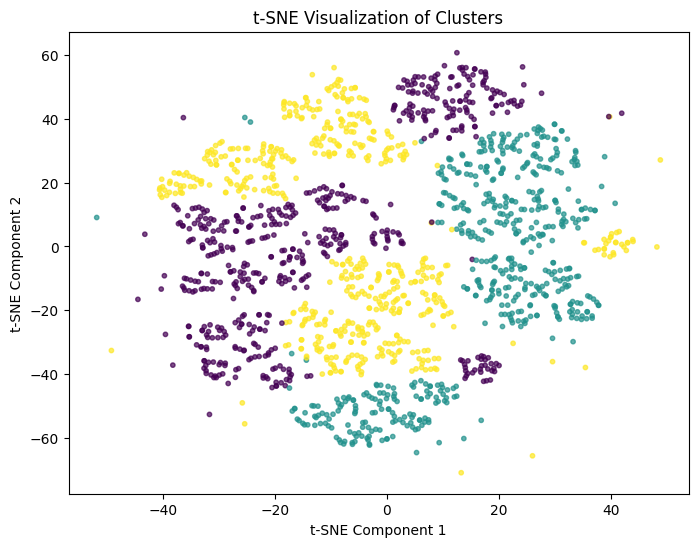

In [ ]:
# With PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_obj = pca.fit_transform(new_data_df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_obj)
print(f"Silhouette Score (Hamming): {silhouette_score(pca_obj, kmeans.predict(pca_obj), metric='hamming')}")
print(f"Silhouette Score (manhattan): {silhouette_score(pca_obj, kmeans.predict(pca_obj), metric='manhattan')}")
print(f"Silhouette Score (euclidean): {silhouette_score(pca_obj, kmeans.predict(pca_obj), metric='euclidean')}")
print(f"Silhouette Score (Pearson): {silhouette_score(pairwise_distances(pca_obj, metric='correlation'), kmeans.predict(pca_obj), metric='precomputed')}")
print(f'Davies Bouldin Score: {davies_bouldin_score(pca_obj, kmeans.predict(pca_obj))}')

# Plot the PCA results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_obj_new[:, 0], pca_obj_new[:, 1], s=10, c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Word Embedding 2

In [30]:
import pandas as pd
import numpy as np
import sklearn

In [31]:
df = pd.read_csv("dataset.csv")
df = df.fillna(np.nan)

x = df[["Major", "Personality", "Interests", "Communication_Style", "Looking_for", "Favorite_Subject", "Study_Location", "Study_Time"]].apply(lambda x: ", ".join(x.dropna()), axis=1)
x

0       DS, ENFJ, V-pop, Volleyball, Board games, Text...
1       ICT, ENTP, EDM, Board games, DIY, Movie, Netfl...
2       ICT, ESFP, Football, Cooking, Food tour, Trave...
3       ICT, ENTP, K-pop, Ballet, Dancing, Singing, Ma...
4                                                Pharmacy
                              ...                        
1630    Pharmacy, ESTP, Dancing, Anime, Text message, ...
1631    AE, ENFJ, Board games, K-pop, In-person (face-...
1632    AMS, INFP, Badminton, Investment, Swimming, St...
1633    AMS, INTP, Makeup, Anime, Politics, Board game...
1634    MST, ESTP, Food tour, Skiing, Vlogging, Board ...
Length: 1635, dtype: object

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
m = X.toarray()


#### Without Dimensional Reduction

d:\B3\Group Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (Hamming): 0.05302913737461471
Silhouette Score (manhattan): 0.12434527908052673
Silhouette Score (euclidean): 0.06538259842591927
Silhouette Score (Pearson): 0.12164075070894555
Davies Bouldin Score: 4.1676793585338485


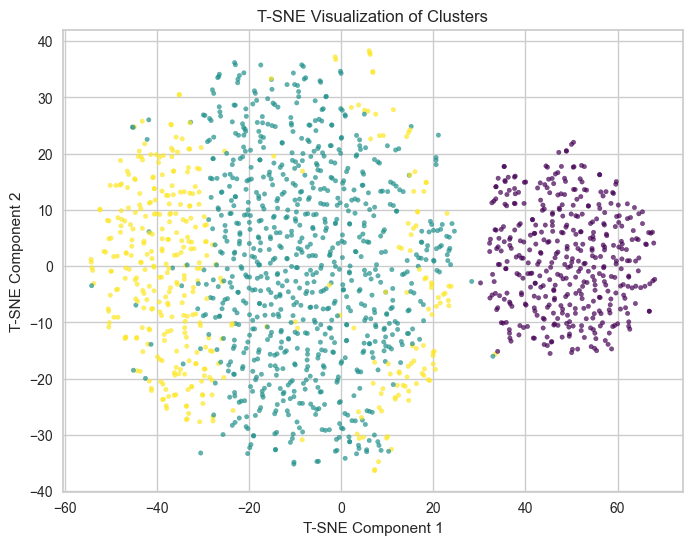

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X.toarray())
print(f"Silhouette Score (Hamming): {silhouette_score(X.toarray(), kmeans.predict(X.toarray()), metric='hamming')}")
print(f"Silhouette Score (manhattan): {silhouette_score(X.toarray(), kmeans.predict(X.toarray()), metric='manhattan')}")
print(f"Silhouette Score (euclidean): {silhouette_score(X.toarray(), kmeans.predict(X.toarray()), metric='euclidean')}")
print(f"Silhouette Score (Pearson): {silhouette_score(pairwise_distances(X.toarray(), metric='correlation'), kmeans.predict(X.toarray()), metric='precomputed')}")
print(f'Davies Bouldin Score: {davies_bouldin_score(X.toarray(), kmeans.predict(X.toarray()))}')

pca = PCA(n_components=2)
pca_obj = pca.fit_transform(X.toarray())

tsne = TSNE(n_components=2)
tsne_obj = tsne.fit_transform(X.toarray())

# Plot the PCA results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.title('T-SNE Visualization of Clusters')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.show()

#### PCA

d:\B3\Group Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (Hamming): 0.0
Silhouette Score (manhattan): 0.8160492075846102
Silhouette Score (euclidean): 0.8349850208202338
Silhouette Score (Pearson): -0.005504587155963303
Davies Bouldin Score: 0.219840553213289


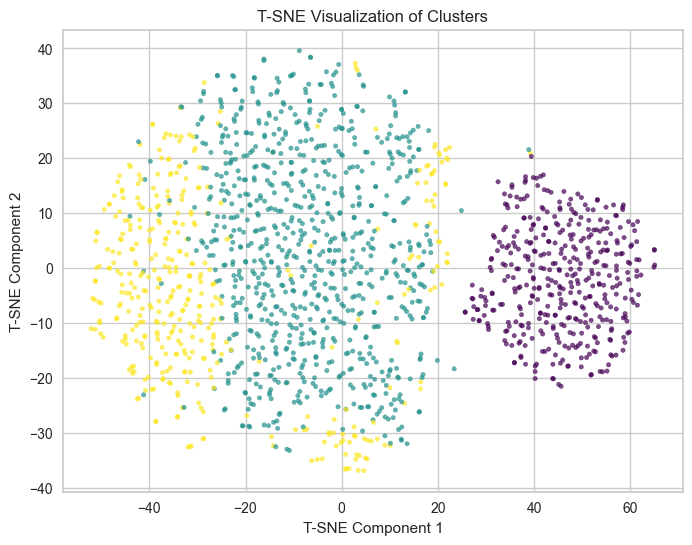

In [34]:
# With PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
pca_obj = pca.fit_transform(X.toarray())

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_obj)
print(f"Silhouette Score (Hamming): {silhouette_score(pca_obj, kmeans.predict(pca_obj), metric='hamming')}")
print(f"Silhouette Score (manhattan): {silhouette_score(pca_obj, kmeans.predict(pca_obj), metric='manhattan')}")
print(f"Silhouette Score (euclidean): {silhouette_score(pca_obj, kmeans.predict(pca_obj), metric='euclidean')}")
print(f"Silhouette Score (Pearson): {silhouette_score(pairwise_distances(pca_obj, metric='correlation'), kmeans.predict(pca_obj), metric='precomputed')}")
print(f'Davies Bouldin Score: {davies_bouldin_score(pca_obj, kmeans.predict(pca_obj))}')

tsne = TSNE(n_components=2)
tsne_obj = tsne.fit_transform(X.toarray())

# Plot the PCA results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.title('T-SNE Visualization of Clusters')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.show()


# K-mode

In [29]:
import pandas as pd
import numpy as np
import sklearn

In [30]:
# !pip install kmodes

Silhouette Score (Hamming): 0.13898000560876875
Silhouette Score (manhattan): 0.13898000560876878
Davies Bouldin Score: 3.4501719456354536


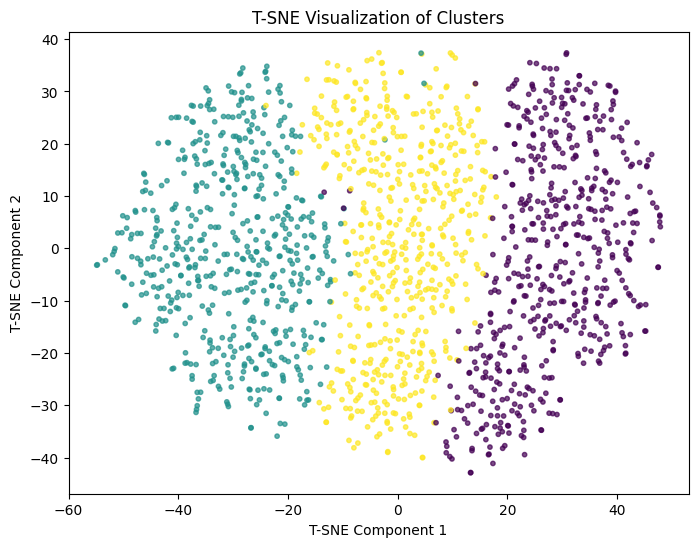

In [31]:
# k modes clustering
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
pca_obj = pca.fit_transform(train_data)

tsne = TSNE(n_components=2)
tsne_obj = tsne.fit_transform(train_data)

# model
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(train_data, categorical=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Print evaluation metrics (optional)
print(f"Silhouette Score (Hamming): {silhouette_score(train_data, clusters, metric='hamming')}")
print(f"Silhouette Score (manhattan): {silhouette_score(train_data, clusters, metric='manhattan')}")
print(f"Davies Bouldin Score: {davies_bouldin_score(train_data, clusters)}")

# Plot the PCA results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=clusters, alpha=0.7, cmap='viridis')
plt.title('T-SNE Visualization of Clusters')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.show()


Silhouette Score (Hamming): 0.0357930765548042
Silhouette Score (manhattan): 0.03579307655480939
Davies Bouldin Score: 4.186115088829894


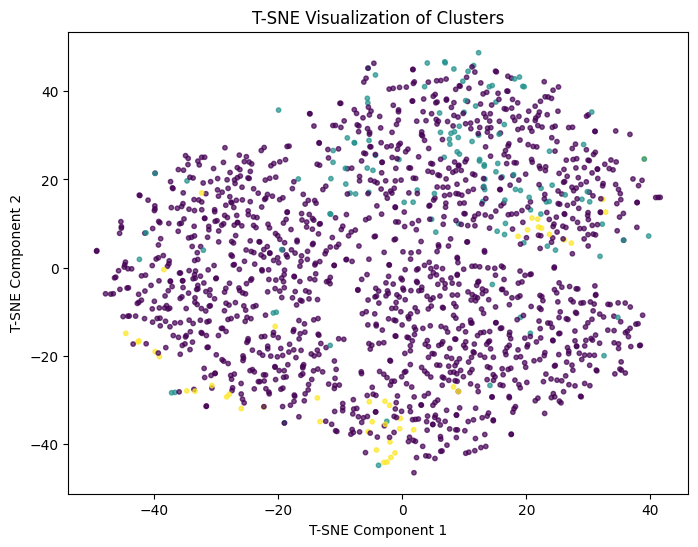

In [34]:
# K Mode
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
pca_obj = pca.fit_transform(train_data)

# Apply KMeans clustering
km = KModes(n_clusters=3, init='Cao', n_init=10)
clusters = km.fit_predict(train_data)

# Print evaluation metrics (optional)
print(f"Silhouette Score (Hamming): {silhouette_score(train_data, clusters, metric='hamming')}")
print(f"Silhouette Score (manhattan): {silhouette_score(train_data, clusters, metric='manhattan')}")
print(f"Davies Bouldin Score: {davies_bouldin_score(train_data, clusters)}")

tsne = TSNE(n_components=2)
tsne_obj = tsne.fit_transform(train_data)

# Plot the PCA results with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_obj[:, 0], tsne_obj[:, 1], s=10, c=clusters, alpha=0.7, cmap='viridis')
plt.title('T-SNE Visualization of Clusters')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.show()
